In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
# Chargement du jeu de données

df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#1. Explore this dataset using what you have learned in data preprocessing and data visualization
##data preprocessing
###data cleaning
####Recherche de valeurs manquantes

df.isnull().sum()

''' Result : there is no missing value'''

' Result : there is no missing value'

In [4]:
#### Correction du format de la caractéristique 'date' et création de nouvelles caractéristiques pour chaque partie

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_of_week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,2
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,4


In [5]:
###feature transformation
#### Recherche de données catégorielles

df.info()

'''Result : there is none'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

'Result : there is none'

In [6]:
#### Conversion des flottants en entiers

df['price'] = df['price'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['lat'] = df['lat'].astype(int)
df['long'] = df['long'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int32         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int32         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int32         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
###Feature selection

df.describe()

#### Suppression des caractéristiques que nous considérons comme inutiles
A = df.drop(['date','lat','long','month','day_of_week','sqft_living15','sqft_lot15'], axis=1)
A.set_index('id', inplace=True)
A

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year
id,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,2014
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,2014
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2015
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,2014
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,2014
6600060120,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,2015
1523300141,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,2014


In [8]:
#2. Write a paragraph selecting the most important features (feature selection). 

## Crée un DataFrame "V" en supprimant la colonne 'price' du DataFrame "A", avec les features d'origine
V = A.drop('price', axis=1)

## Crée une série "y" qui contient les valeurs de la colonne 'price' du DataFrame "A"
y = A['price']
 

In [9]:
# Calculer la matrice de corrélation
corr_matrix = A.corr()

# Obtenir la valeur absolue des corrélations avec 'price'
abs_corr = corr_matrix['price'].abs()

# Trier les corrélations par ordre décroissant et sélectionner les 2 (dont price)
top_corr = abs_corr.sort_values(ascending=False).head(2)

# Afficher les 10 caractéristiques ayant la plus grande corrélation avec 'price'
print(top_corr)

price          1.000000
sqft_living    0.702035
Name: price, dtype: float64


In [10]:
columns_to_keep = ['price','sqft_living']

columns_to_drop = [col for col in A.columns if col not in columns_to_keep]
B = A.drop(columns_to_drop, axis=1)
B


,price,sqft_living
id,,
7129300520,221900,1180
6414100192,538000,2570
5631500400,180000,770
2487200875,604000,1960
1954400510,510000,1680
...,...,...
263000018,360000,1530
6600060120,400000,2310
1523300141,402101,1020


In [11]:
#3. Split your dataset into a training set and a testing set.

## Crée une matrice "x" contenant les valeurs de la colonne 'sqft_lot' du DataFrame "B"
x=B["sqft_living"].values[:,np.newaxis]

## Crée un tableau "y" contenant les valeurs de la colonne 'price' du DataFrame "B"
y=B["price"].values

## Divise les données en ensembles d'entraînement et de test avec une taille de test de 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%



In [12]:
#4. Apply linear regression to your training set.

## Crée un objet de régression linéaire
model=LinearRegression()

## Entraîne le modèle de régression linéaire sur les données d'entraînement
model.fit(x_train,y_train)

## Utilise le modèle entraîné pour prédire les valeurs de 'y' pour les données de test
predicted=model.predict(x_test)

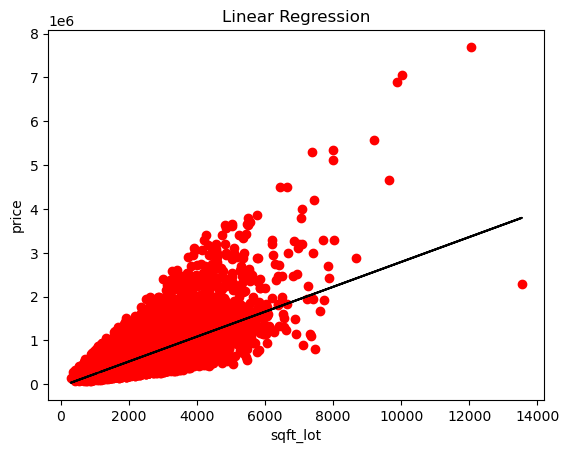

In [13]:
#5. Plot the linear regression.

## Trace un nuage de points des données avec 'sqft_lot' en abscisse et 'price' en ordonnée
plt.scatter(x,y,color="r")

## Donne un titre au graphique
plt.title("Linear Regression")

## Nomme l'axe des ordonnées "price"
plt.ylabel("price")

## Nomme l'axe des abscisses "sqft_lot"
plt.xlabel("sqft_lot")

## Trace la ligne de régression linéaire
plt.plot(x,model.predict(x),color="k")

## Affiche le graphique
plt.show()

In [14]:
#5. Measure the performance of linear regression using the testing set. 

## Calcule et affiche l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les valeurs prédites
print("MSE", mean_squared_error(y_test,predicted))

## Calcule et affiche le coefficient de détermination R² entre les valeurs réelles et les valeurs prédites
print("R squared", metrics.r2_score(y_test,predicted))  

MSE 62902408306.86502
R squared 0.4996528488387417


In [15]:
'''
Erreur Quadratique Moyenne (MSE) : 62902408306.86502. 
Cette valeur est assez élevée, ce qui indique que le modèle de régression linéaire simple a une précision relativement faible. 
En d’autres termes, les prédictions du modèle sont assez éloignées des valeurs réelles.

R squared : 0.4996528488387417. 
Ce coefficient est proche de 0.5, ce qui indique que le modèle de régression linéaire simple explique environ la moitié de la variabilité des réponses observées. 
En d’autres termes, environ 50% de la variation du prix des maisons peut être expliquée par la caractéristique utilisée.

'''

'\nErreur Quadratique Moyenne (MSE) : 62902408306.86502. \nCette valeur est assez élevée, ce qui indique que le modèle de régression linéaire simple a une précision relativement faible. \nEn d’autres termes, les prédictions du modèle sont assez éloignées des valeurs réelles.\n\nR squared : 0.4996528488387417. \nCe coefficient est proche de 0.5, ce qui indique que le modèle de régression linéaire simple explique environ la moitié de la variabilité des réponses observées. \nEn d’autres termes, environ 50% de la variation du prix des maisons peut être expliquée par la caractéristique utilisée.\n\n'

In [16]:
#6. Apply multiple-linear regression and compare it to the linear model. 

##Feature selection

# Calculer la matrice de corrélation
corr_matrix = A.corr()

# Obtenir la valeur absolue des corrélations avec 'price'
abs_corr = corr_matrix['price'].abs()

# Trier les corrélations par ordre décroissant et sélectionner les 6 premières dont price
top_5_corr = abs_corr.sort_values(ascending=False).head(6)

# Afficher les 5 caractéristiques ayant la plus grande corrélation avec 'price'
print(top_5_corr)


price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.510072
view           0.397293
Name: price, dtype: float64


In [17]:
## Définit une liste des colonnes à conserver avec le resultats des correlations
columns_to_keep2 = ['price','sqft_living','grade','sqft_above','bathrooms','view']

## Crée une liste des colonnes à supprimer en parcourant toutes les colonnes du DataFrame "A" et en ajoutant à la liste celles qui ne sont pas dans la liste des colonnes à conserver
columns_to_drop = [col for col in A.columns if col not in columns_to_keep2]

# Crée un nouveau DataFrame "X" en supprimant les colonnes à supprimer du DataFrame "A"
X = A.drop(columns_to_drop, axis=1)

## Affiche le contenu du DataFrame "X"
X


,price,bathrooms,sqft_living,view,grade,sqft_above
id,,,,,,
7129300520,221900,1,1180,0,7,1180
6414100192,538000,2,2570,0,7,2170
5631500400,180000,1,770,0,6,770
2487200875,604000,3,1960,0,7,1050
1954400510,510000,2,1680,0,8,1680
...,...,...,...,...,...,...
263000018,360000,2,1530,0,8,1530
6600060120,400000,2,2310,0,8,2310
1523300141,402101,0,1020,0,7,1020


In [18]:
## Sélectionne les features pour la régression
x = df[['sqft_living','grade','sqft_above','bathrooms','view']]

## Sélectionne la variable cible pour la régression
y = df['price'].values

## Divise les données en ensembles d'entraînement et de test avec une taille de test de 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

## Crée un objet de régression linéaire
model = LinearRegression()

## Entraîne le modèle sur l'ensemble d'entraînement
model.fit(x_train, y_train)

## Utilise le modèle entraîné pour prédire les valeurs de 'y' pour les données de test
predictions = model.predict(x_test)

## Calcule et affiche l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les valeurs prédites
print("MSE", mean_squared_error(y_test,predictions))

## Calcule et affiche le coefficient de détermination R² entre les valeurs réelles et les valeurs prédites
print("R squared", metrics.r2_score(y_test,predictions))  

MSE 52421015581.72307
R squared 0.5830254116926628


In [19]:
'''
Erreur Quadratique Moyenne (MSE) : 52421015581.72307. 
Cette valeur est plus faible que celle de la régression linéaire simple, ce qui indique que le modèle de régression linéaire multiple est plus précis. 
En d’autres termes, les prédictions du modèle sont plus proches des valeurs réelles.

R squared : 0.5830254116926628. 
Ce coefficient est plus élevé que celui de la régression linéaire simple, ce qui indique que le modèle de régression linéaire multiple explique une plus grande partie de la variabilité des réponses observées. 
En d’autres termes, environ 58% de la variation du prix des maisons peut être expliquée par les caractéristiques utilisées dans le modèle de régression linéaire multiple.

'''

'\nErreur Quadratique Moyenne (MSE) : 52421015581.72307. \nCette valeur est plus faible que celle de la régression linéaire simple, ce qui indique que le modèle de régression linéaire multiple est plus précis. \nEn d’autres termes, les prédictions du modèle sont plus proches des valeurs réelles.\n\nR squared : 0.5830254116926628. \nCe coefficient est plus élevé que celui de la régression linéaire simple, ce qui indique que le modèle de régression linéaire multiple explique une plus grande partie de la variabilité des réponses observées. \nEn d’autres termes, environ 58% de la variation du prix des maisons peut être expliquée par les caractéristiques utilisées dans le modèle de régression linéaire multiple.\n\n'

In [20]:
#7. Apply polynomial regression and compare it to linear and multilinear regression.

## Sélectionne les features pour la régression
x = df[['sqft_living','grade','sqft_above','bathrooms','view']]

## Sélectionne la variable cible pour la régression
y = df['price'].values

## Divise les données en ensembles d'entraînement et de test avec une taille de test de 35%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)

## Crée un objet de régression linéaire
lg=LinearRegression()

## Crée un objet PolynomialFeatures de degré 2
poly=PolynomialFeatures(degree=3)

## Transforme les données d'entraînement en ajoutant des termes polynomiaux
x_train_fit = poly.fit_transform(x_train)  

## Entraîne le modèle sur l'ensemble d'entraînement transformé
lg.fit(x_train_fit, y_train)  

## Transforme les données de test en ajoutant des termes polynomiaux
x_test_ = poly.fit_transform(x_test)

## Utilise le modèle entraîné pour prédire les valeurs de 'y' pour les données de test transformées
predicted = lg.predict(x_test_)

## Calcule et affiche l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les valeurs prédites
print("MSE: ", metrics.mean_squared_error(y_test, predicted))

## Calcule et affiche le coefficient de détermination R² entre les valeurs réelles et les valeurs prédites
print("R squared: ", metrics.r2_score(y_test,predicted))  

MSE:  45898182097.32119
R squared:  0.6349102478900004


In [21]:
'''
MSE : 45898182097.32119. 
Cette valeur est la plus faible des trois, ce qui indique que le modèle de régression polynomiale est le plus précis des trois.

R squared : 0.6349102478900004. 
Ce coefficient est le plus élevé des trois, ce qui indique que le modèle de régression polynomiale explique la plus grande partie de la variabilité des réponses observées.

En regardant tous les résultats ensemble, on peut conclure que la régression polynomiale est le modèle le plus performant des trois pour prédire le prix des maisons à partir des caractéristiques sélectionnées, car elle a la MSE la plus faible et le R squared le plus élevé. 

'''

'\nMSE : 45898182097.32119. \nCette valeur est la plus faible des trois, ce qui indique que le modèle de régression polynomiale est le plus précis des trois.\n\nR squared : 0.6349102478900004. \nCe coefficient est le plus élevé des trois, ce qui indique que le modèle de régression polynomiale explique la plus grande partie de la variabilité des réponses observées.\n\nEn regardant tous les résultats ensemble, on peut conclure que la régression polynomiale est le modèle le plus performant des trois pour prédire le prix des maisons à partir des caractéristiques sélectionnées, car elle a la MSE la plus faible et le R squared le plus élevé. \n\n'